## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.pkl"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [3]:
happiness: pd.DataFrame = pd.read_pickle(HAPPINESS_DATASET)
happiness.country = happiness.country.map(str.lower) # Set the country to lower case
happiness.set_index('country', inplace=True) # Use country as the index
happiness.head()

,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
country,,,,,,,
afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [4]:
# Write your code here
countries = pd.read_csv(COUNTRIES_DATASET, index_col='country_name')
countries.literacy = countries.literacy.str.replace(',','.')
countries.literacy = countries.literacy.astype(float) #convert literacy to float to be able to compare them
countries.head()

,area,population,literacy
country_name,,,
afghanistan,647500,31056997,36.0
albania,28748,3581655,86.5
algeria,2381740,32930091,70.0
argentina,2766890,39921833,97.1
armenia,29800,2976372,98.6


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [5]:
# Write your code here
happiness_countries = happiness.merge(countries, left_index=True, right_index=True)
happiness_countries.head()

,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
country,,,,,,,,,,
afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [6]:
# Write your code here
happiness_countries.nlargest(10, 'happiness_score', keep='all')

,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
country,,,,,,,,,,
finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,338145,5231372,100.0
denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,43094,5450661,100.0
switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe,41290,7523934,99.0
iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,103000,299388,99.9
norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,323802,4610820,100.0
netherlands,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe,41526,16491461,99.0
sweden,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe,449964,9016596,99.0
new zealand,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139,North America and ANZ,268680,4076140,99.0
austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe,83870,8192880,98.0


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [7]:
# Write your code here
by_countries = happiness_countries.groupby(happiness_countries.world_region)
ordered_world_region = by_countries['happiness_score'].aggregate(['mean', 'count']).sort_values('mean', ascending=False).rename(columns={'mean': 'average happiness', 'count': 'nb countries'})
ordered_world_region

,average happiness,nb countries
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [8]:
# Write your code here
fst_world_region = ordered_world_region.index[0]
by_countries.get_group(fst_world_region).happiness_score

country
australia        7.2228
canada           7.2321
new zealand      7.2996
united states    6.9396
Name: happiness_score, dtype: float64

## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [9]:
# Write your code here
max_literacy = happiness_countries[happiness_countries['literacy'].apply(lambda x: x == 100.0)]
max_literacy_v2 = happiness_countries.query('literacy == 100.0') # Same output, but easier to read
for x, y in max_literacy.iterrows():
    print(('%s - %s (%s)' % (y['world_region'], x, y['happiness_score'])))


North America and ANZ - australia (7.222799778)
Western Europe - denmark (7.645599842)
Western Europe - finland (7.808700085)
Western Europe - luxembourg (7.2375001910000005)
Western Europe - norway (7.487999916000001)


What is the global average?

In [10]:
# Write your code here
happiness_countries.literacy.mean()

81.85112781954888

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [11]:
# Write your code here
low_literacy = happiness_countries.loc[happiness_countries.literacy < 50]
print('%.2f%% of the countries have a literacy level below 50%%' % (low_literacy.shape[0]/happiness_countries.shape[0]*100))

11.85% of the countries have a literacy level below 50%


Print the raw number and the percentage of world population that is illiterate.

In [12]:
# Write your code here
low_literacy_pop = low_literacy.population.sum()
print('The number of illiterate people is %i, and the percentage that it represents is %.2f%%' %(low_literacy_pop, low_literacy_pop/happiness_countries.population.sum()*100))

The number of illiterate people is 580572946, and the percentage that it represents is 9.45%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [13]:
# Write your code here
happiness_countries['population_density'] = happiness_countries.population / happiness_countries.area
happiness_countries

,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
country,,,,,,,,,,,
afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0,47.964474
albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5,124.587971
algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0,13.826065
argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1,14.428413
armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6,99.878255
...,...,...,...,...,...,...,...,...,...,...,...
venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,93.4,28.211650
vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,90.3,256.108041
yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,50.2,40.639029


What is the happiness score of the 3 countries with the lowest population density?

In [14]:
# Write your code here
happiness_countries.nsmallest(3, ['population_density'], keep='all').happiness_score

country
mongolia     5.4562
australia    7.2228
botswana     3.4789
Name: happiness_score, dtype: float64

## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

Text(0, 0.5, 'Life expectancy')

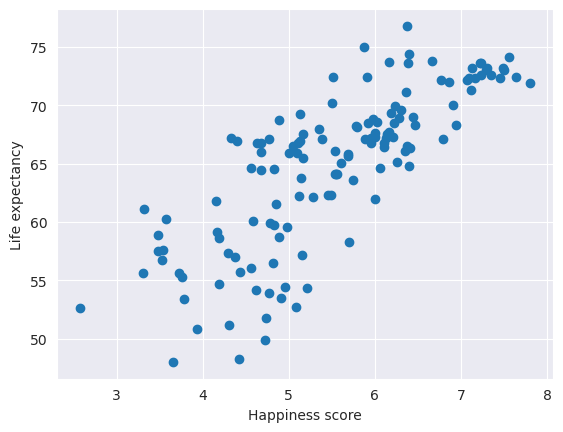

In [29]:
# Write your code here
# With matplotlib
import matplotlib.pyplot as plt
plt.scatter(happiness_countries.happiness_score, happiness_countries.healthy_life_expectancy)
plt.xlabel('Happiness score')
plt.ylabel('Life expectancy')

<Axes: xlabel='Happiness score', ylabel='Life expectancy'>

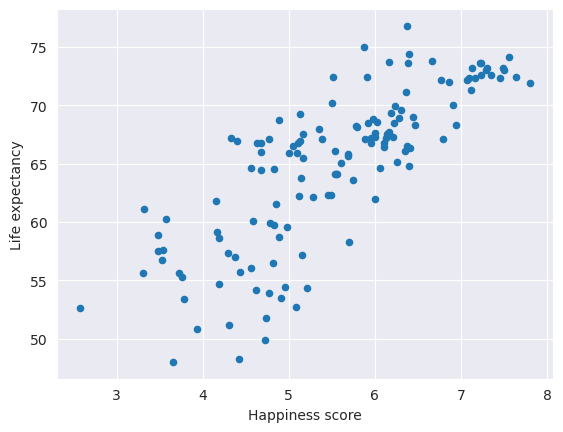

In [25]:
# With pandas
happiness_countries.plot.scatter(x='happiness_score', y='healthy_life_expectancy', xlabel='Happiness score', ylabel='Life expectancy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.